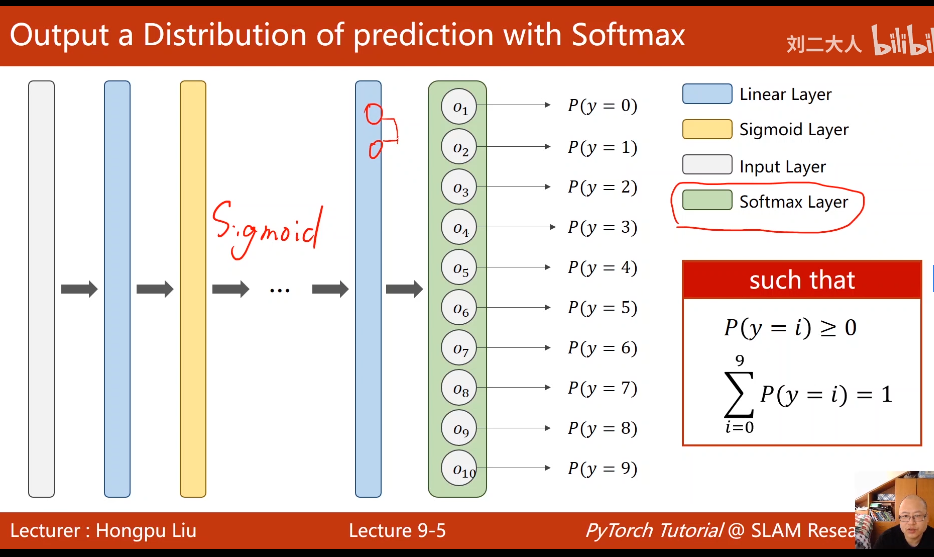

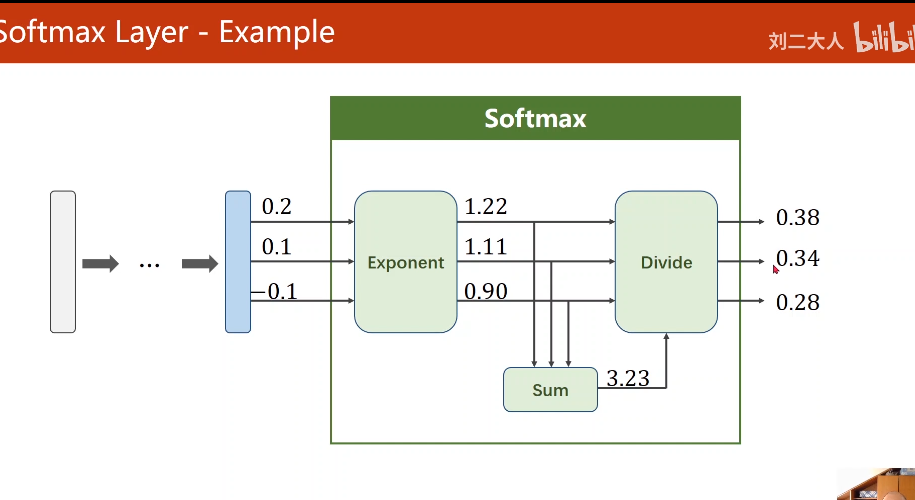

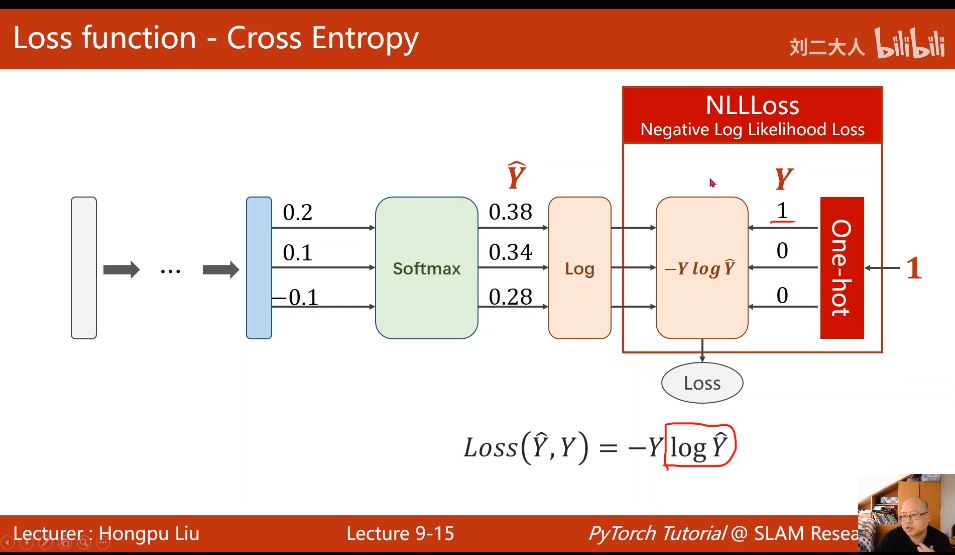

In [1]:
import numpy as np

In [3]:
y = np.array([1, 0, 0])
z = np.array([0.2, 0.1, -0.1])
# softmax
y_pred =np.exp(z) / np.exp(z).sum()
# Loss
loss = (-y * np.log(y_pred)).sum()

In [4]:
y_pred

array([0.37797814, 0.34200877, 0.28001309])

In [5]:
np.exp(z)

array([1.22140276, 1.10517092, 0.90483742])

In [6]:
loss

0.9729189131256584

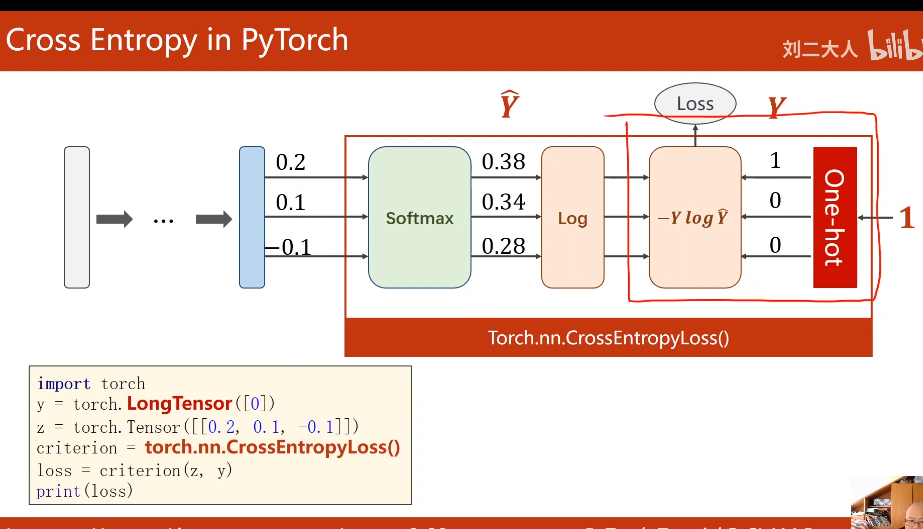

In [8]:
import torch
criterion = torch.nn.CrossEntropyLoss()
Y = torch.LongTensor([2, 0, 1])

Y_pred1 = torch.Tensor([[0.1, 0.2, 0.9],#2
                        [1.1, 0.1, 0.2],#0
                        [0.2, 2.1, 0.1]])#1
Y_pred2 = torch.Tensor([[0.8, 0.2, 0.3],#0
                        [0.2, 0.3, 0.5],#2
                        [0.2, 0.2, 0.5]])#2
l1 = criterion(Y_pred1, Y)
l2 = criterion(Y_pred2, Y)
print(l1,l2)

tensor(0.4966) tensor(1.2389)


In [1]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import otto-group-product-classification-challenge
import torch.nn.functional as F
import torch.optim as optim

In [2]:
batch_size = 64
transform = transforms.Compose([
 transforms.ToTensor(),
    transforms.Normalize((0.137,),(0.308, ))
])

In [3]:
train_dataset = datasets.MNIST(root='../dataset/mnist',
                               train=True,
                               download=True,
                               transform=transform)
train_loader = DataLoader(dataset=train_dataset, 
                         shuffle=True,
                         batch_size=batch_size)

Extracting ../dataset/mnist\MNIST\raw\train-images-idx3-ubyte.gz to ../dataset/mnist\MNIST\raw


Extracting ../dataset/mnist\MNIST\raw\train-labels-idx1-ubyte.gz to ../dataset/mnist\MNIST\raw


Extracting ../dataset/mnist\MNIST\raw\t10k-images-idx3-ubyte.gz to ../dataset/mnist\MNIST\raw


Extracting ../dataset/mnist\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../dataset/mnist\MNIST\raw
Processing...


..\torch\csrc\utils\tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Done!


In [7]:
test_transfomer = datasets.MNIST(root='../dataset/mnist',
                               train=False,
                               download=True,
                               transform=transform)
test_loader = DataLoader(dataset=test_transfomer,
                        shuffle=False, # test没有意义
                        batch_size=batch_size)

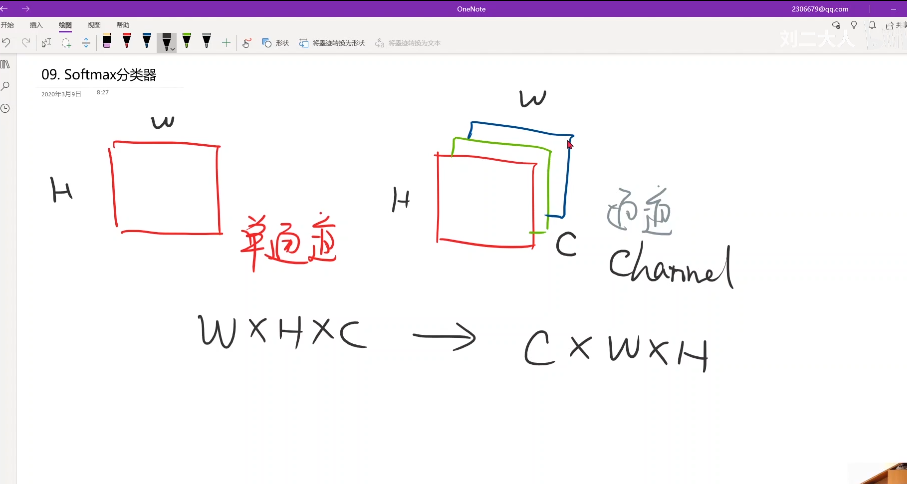

第一步将图像转换成pytorch里面的张量，并变成0~1之间的数

第二步是归一化，用均值mean和标准差std(应该提前算出来)
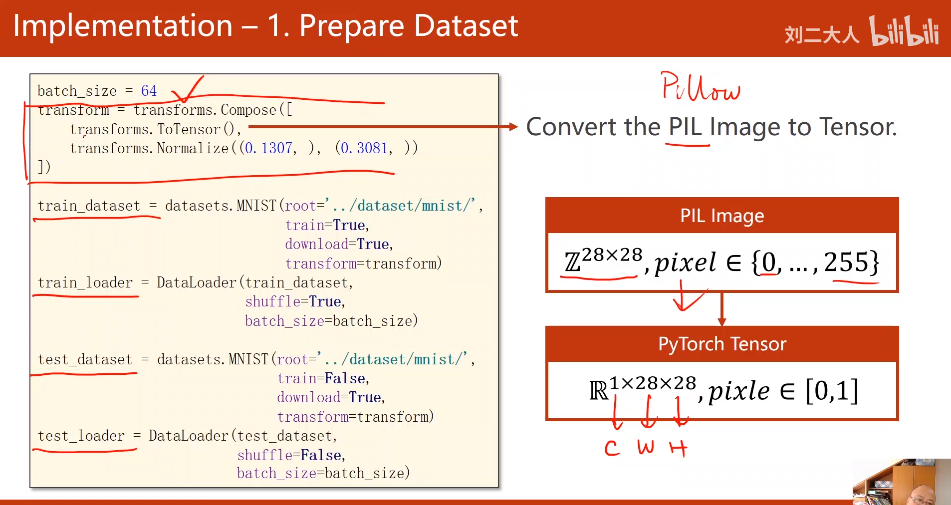

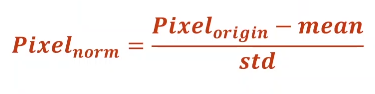

In [21]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.l1 = torch.nn.Linear(784,512)
        self.l2 = torch.nn.Linear(512, 256)
        self.l3 = torch.nn.Linear(256, 128)
        self.l4 = torch.nn.Linear(128,64)
        self.l5 = torch.nn.Linear(64,10)
        
    def forward(self, x):
        x = x.view(-1,784)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = F.relu(self.l4(x))
        #x = F.relu(self.l5(x))
        return self.l5(x)
    
model = Net() 

In [39]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [40]:
def train(epoch):
    trainning_loss = 0.0
    # 取出数值
    for batch_idx, data in enumerate(train_loader,0):
        inputs, target = data
        # 清零
        optimizer.zero_grad()
        
        # forward + backward + update
        # 前馈
        outputs = model(inputs)
        loss = criterion(outputs, target)
        # 反馈
        loss.backward()
        # 更新
        optimizer.step()
        
        trainning_loss += loss.item()
        if batch_idx % 300 == 299:
            print('[{0},{1} loss:{2}]'.format(epoch+1, batch_idx+1, trainning_loss/300))
            trainning_loss = 0.0
def test():
    correct = 0
    total = 0
    # 不用计算梯度
    with torch.no_grad():
        for data in test_loader:
            images, label = data
            # 预测
            outputs = model(images)
            # 每行最大的下标值                  按照第一个维度 横着
            _, predicted = torch.max(outputs.data, dim=1)
            total += label.size(0)
            # 张量之间的比较运算
            correct += (predicted == label).sum().item()
    print('Accuracy on test set : %d %%'%(100 * correct/total))
            

In [41]:
for epoch in range(10):
    train(epoch)
    test()

[1,300 loss:2.2201357853412627]
[1,600 loss:1.0042189617951711]
[1,900 loss:0.4647188954055309]
Accuracy on test set : 88 %
[2,300 loss:0.34162131167948245]
[2,600 loss:0.2779978218177954]
[2,900 loss:0.22359316586206357]
Accuracy on test set : 94 %
[3,300 loss:0.18544767659157516]
[3,600 loss:0.162891573968033]


KeyboardInterrupt: 

In [18]:
train_loader.get(0)

AttributeError: 'DataLoader' object has no attribute 'get'

In [38]:
print([each for each in model.parameters()])

[Parameter containing:
tensor([[ 0.0353, -0.0104,  0.0044,  ..., -0.0128,  0.0229,  0.0014],
        [ 0.0103, -0.0046,  0.0323,  ..., -0.0268,  0.0266,  0.0121],
        [ 0.0190, -0.0345,  0.0344,  ...,  0.0257, -0.0058, -0.0260],
        ...,
        [-0.0022,  0.0273,  0.0083,  ...,  0.0310,  0.0324,  0.0295],
        [-0.0099,  0.0003,  0.0150,  ...,  0.0208, -0.0073,  0.0323],
        [ 0.0206, -0.0212, -0.0095,  ..., -0.0011, -0.0248,  0.0168]],
       requires_grad=True), Parameter containing:
tensor([-2.9865e-02, -8.1030e-03, -1.5976e-02, -3.3430e-02,  2.5051e-02,
         7.1671e-03, -6.4408e-03, -9.9956e-03,  1.5193e-03, -1.1229e-02,
         3.3582e-02,  9.0511e-03, -2.1952e-02,  1.8688e-03,  2.2599e-02,
        -1.8207e-02,  2.7120e-02,  1.2873e-02,  8.9605e-03,  3.4549e-02,
         1.6359e-02, -3.1287e-02, -1.4781e-02, -5.8032e-03,  2.9906e-02,
        -1.4467e-02, -2.3400e-02,  3.4149e-02,  9.0068e-03, -5.6319e-03,
        -1.7017e-02, -2.6528e-02, -2.2938e-02,  2.9318e